## Train a word2vec

tutorial

http://adventuresinmachinelearning.com/gensim-word2vec-tutorial/



In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from gensim.models import Word2Vec

model=None
para_path = '/home/derricksu/model_para/CRNN_2nd'
if not os.path.exists(para_path):
    os.mkdir(para_path)

In [2]:
# The function "text_to_wordlist" is from
# https://www.kaggle.com/currie32/quora-question-pairs/the-importance-of-cleaning-text
def text_to_wordlist(text, remove_stopwords=False, stem_words=False):
    # Clean the text, with the option to remove stopwords and to stem words.
    import re
    # Convert words to lower case and split them
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9,!.\/'-=?]", " ", text) # origin is [^A-Za-z0-9^,!.\/'+-=?]
    text = re.sub(r"what ' s", "what is ", text)
    # my turn
    text = re.sub(r"he ' s", "he is", text)
    text = re.sub(r"she ' s", "she is", text)
    text = re.sub(r"it ' s", "it is", text)
    text = re.sub(r"let ' s", "let us", text)
    text = re.sub(r"can ' t", "can not ", text)
    text = re.sub(r"4get", "forget ", text)
    text = re.sub(r"coo[o]+", "cooo", text)
    text = re.sub(r"so[o]+", "sooo ", text)
    text = re.sub(r" [0-9]+ : [0-9]+", " aa:bb ", text) #時間
    text = re.sub(r" [0-9]+", " ", text) #去除純數字
    text = re.sub(r"\?", " ? ", text)
    text = re.sub(r"\.\.[\.]+", " a... ", text)
    text = re.sub(r"uh[h]+", " uh ", text)
    text = re.sub(r"zz[z]+", " zzz ", text)
    text = re.sub(r"loo[o]+l", " lool ", text)
    text = re.sub(r" \.\.", " ", text)
    
    #end my turn
    text = re.sub(r"\' s", " ", text)
    text = re.sub(r"\' ve", " have ", text)
    text = re.sub(r"can ' t", "can not ", text)
    text = re.sub(r"n ' t", " not ", text)
    text = re.sub(r"i ' m", "i am ", text)
    text = re.sub(r"\' re", " are ", text)
    text = re.sub(r"\' d", " would ", text)
    text = re.sub(r"\' ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r" \.", " ", text)
    
    text = re.sub(r"!![!]+", " !!! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r" \=", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r" : ", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    #text = re.sub(r" u s ", " american ", text)
    #text = re.sub(r"\0s", "0", text)
    #text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return text

In [3]:
text_to_wordlist("a 33 : 33 ..  e - mail")

'a aa:bb email'

## Loading data

In [4]:
nolabel = np.load("/home/derricksu/ML_data/hw4/train_nolabel.npy")
train_path = "/home/derricksu/ML_data/hw4/train.npy"
train = np.load(train_path)
test_path = "/home/derricksu/ML_data/hw4/test.npy"
test = np.load(test_path)

可考慮字出現次數來篩選

In [5]:
from collections import defaultdict

# Record frequency of each word
word_freq=defaultdict(int)

# nolabel
sentence = []
for row in nolabel:
    x = text_to_wordlist(row).split()
    sentence.append(x)
    for s in x:
        word_freq[s]+=1

print("After nolabel: %d" % len(word_freq))

# label
X_data = train[:,1]
y_data = train[:,0].astype('int')


train_sentence = []

for i,row in enumerate(X_data):
    x = text_to_wordlist(row).split()
    train_sentence.append(x)
    for s in x:
        word_freq[s]+=1
print("After label: %d" % len(word_freq))

test_sentence = []
for i,row in enumerate(test[1::,1]): #第一列不為name
    x = text_to_wordlist(row).split()
    test_sentence.append(x)
    for s in x:
        word_freq[s]+=1
print("After test: %d" % len(word_freq))


After nolabel: 229954
After label: 235898
After test: 241758


In [6]:
## record freq<5

count_less5=[]
count=[]
for key in word_freq.keys():
    if word_freq[key]<5:
        count_less5.append((key,word_freq[key]))
        count.append(word_freq[key])
print("Count already.")

Count already.


In [7]:
np.array(count).mean() , np.array(count).std()

(1.5900279945707498, 0.84853927416069663)

In [8]:
import pickle
save_dict = False

word_freq_path = os.path.join(para_path , 'word_freq.pk')
if save_dict:
    with open(word_freq_path,"wb") as pk:
        pickle.dump( word_freq,pk )
        pk.close()
else:
    with open(word_freq_path,"rb") as pk:
        word_freq = pickle.load(pk)
        pk.close()
        
print("word_freq is already")

word_freq is already


## Train a word2vec

sg defines the training algorithm. By default (sg=0), CBOW is used. Otherwise (sg=1), skip-gram is employed.

In [9]:
min_c = 5
load_switch = False
word2vec_path = os.path.join(para_path , 'word2vec.bin')

if not load_switch:
    print("train word2vec...") 
    # sg defines the training algorithm. By default (sg=0), CBOW is used. Otherwise (sg=1), skip-gram is employed. window=12
    my_word2vec = Word2Vec(sentence + train_sentence + test_sentence, sg = 0,#window=15,
                           iter=30, min_count=min_c,size=128,workers=16)
    # summarize the loaded model
    print(my_word2vec)
    # summarize vocabulary
    words = list(my_word2vec.wv.vocab)
    #print(words)
    # access vector for one word
    print(my_word2vec['sentence'].shape)
    # save model
    my_word2vec.save(word2vec_path)
else:
    print("load model...") 
    my_word2vec = Word2Vec.load(word2vec_path)
    #print(my_word2vec)

vocab = dict([(k, v.index) for k, v in my_word2vec.wv.vocab.items()])
weight_matrix = my_word2vec.wv.syn0 #word_to_vec
print("Weight_matrix shape : " , weight_matrix.shape)
del my_word2vec

print("word2vec is already.")

train word2vec...
Word2Vec(vocab=53150, size=128, alpha=0.025)
(128,)
Weight_matrix shape :  (53150, 128)
word2vec is already.


## word to index

In [10]:
# word to idx of train

train_word2idx=[]
for row in train_sentence:
    idx = []
    for word in row:
        if word_freq[word]>=min_c:
            idx.append(vocab[word])
    train_word2idx.append(idx)

print("Length of train_sentence : ",len(train_sentence))
print("Length of train_word2idx : ",len(train_word2idx))

max_len = 0
for row in train_word2idx:
    if max_len <len(row):
        max_len = len(row)
print("Max length of train sentence : ",max_len)

Length of train_sentence :  200000
Length of train_word2idx :  200000
Max length of train sentence :  95


In [11]:
# word to idx of test

test_word2idx=[]
for row in test_sentence:
    idx = []
    for word in row:
        if word_freq[word]>=min_c:
            idx.append(vocab[word])
    test_word2idx.append(idx)

print("Length of test_sentence : ",len(test_sentence))
print("Length of test_word2idx : ",len(test_word2idx))

max_len = 0
for row in train_word2idx:
    if max_len <len(row):
        max_len = len(row)
print("Max length of test sentence : ",max_len)

Length of test_sentence :  200000
Length of test_word2idx :  200000
Max length of test sentence :  95


## LSTM start

In [12]:
from keras import utils

from keras.models import Sequential ,Model
from keras.layers import Input , Dense,Dropout,Flatten , BatchNormalization , Concatenate
from keras.layers import LSTM , Conv1D , ZeroPadding1D , MaxPooling1D ,AveragePooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence,text

from keras import regularizers
from keras.callbacks import EarlyStopping , History

Y_train = utils.to_categorical(y_data ,2)
X_train = train_word2idx
X_test = test_word2idx


max_review_length = 100

X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

Using TensorFlow backend.


In [ ]:
## Simple model

def build(weight_matrix , vocab):
    embedding_vecor_length = weight_matrix.shape[1]
    word_total_index = len(vocab)

    forget_bias_bool=True #default is False
    recu_drop_rate=0.2
    drop_rate=0.2
    back_bool=False #default False
    unroll_bool=True #default is False. This can speed up but consume more memory
    multi_layer_bool=True #default False

    model = Sequential()
    model.add(Embedding(word_total_index, embedding_vecor_length, input_length=max_review_length,
                       weights = [weight_matrix]))
    
    model.add(Conv1D(128,7,strides=1,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(256,3,strides=1,activation='relu'))
    model.add(ZeroPadding1D(2))
    model.add(MaxPooling1D(5,strides=1))
    #model.add(AveragePooling1D(2,strides=1))
    model.add(Dropout(0.2))
    """
    model.add(LSTM(128,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=multi_layer_bool )) 
                   # Control output of this layer , return a decoded sequence whose dimension is same as input
    model.add(Dropout(0.2))
    """
    model.add(LSTM(256,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=False,
                  unroll=unroll_bool))
    model.add(Dropout(0.2))

    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    
    #model.add(Dense(128,activation='relu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
    print(model.summary())

    return model

try:
    del model
except NameError:
    pass

model = build(weight_matrix , vocab)
    
n_batch = 256
n_epoch = 10

earlystopping=EarlyStopping(monitor='val_categorical_accuracy', patience=3, verbose=0, mode='auto')
history = History()

hist_lstm_2 = model.fit(X_train , Y_train ,
                      batch_size = n_batch,epochs=n_epoch,
                      callbacks=[earlystopping,history],
                      validation_split=0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 100, 128)          6803200   
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 94, 128)           114816    
_________________________________________________________________
dropout_74 (Dropout)         (None, 94, 128)           0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 92, 256)           98560     
_________________________________________________________________
zero_padding1d_11 (ZeroPaddi (None, 96, 256)           0         
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 92, 256)           0         
_________________________________________________________________
dropout_75 (Dropout)         (None, 92, 256)           0         
__________

In [ ]:
## 練習自己建以及使用Merge
## min_c = 3 , use SKIPGRAM
def build(weight_matrix , vocab):
    embedding_vecor_length = weight_matrix.shape[1]
    word_total_index = len(vocab)

    forget_bias_bool=False #default is False
    recu_drop_rate=0.2
    drop_rate=0.2
    back_bool=True #default False
    unroll_bool=True #default is False. This can speed up but consume more memory
    multi_layer_bool=True #default False

    my_input = Input(shape = (max_review_length,))
    embd = Embedding(word_total_index, embedding_vecor_length, input_length=max_review_length,
                       weights = [weight_matrix])(my_input)

    block1_1 = Conv1D(128,5,strides=1,activation='relu')(embd)
    block1_1 = Dropout(0.2)(block1_1)
    block1_1 = Conv1D(128,3,strides=1,activation='relu')(block1_1)
    block1_1 = AveragePooling1D(2,strides=1)(block1_1)
    block1_1 = Dropout(0.2)(block1_1)
    block1_1 = LSTM(256,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=multi_layer_bool)(block1_1)
    block1_1 = LSTM(128,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=False)(block1_1)    
    #block1_1 = Dense(256,activation='relu')(block1_1)


    block1_2 = Conv1D(128,7,strides=1,activation='relu')(embd)
    block1_2 = Dropout(0.2)(block1_2)
    block1_2 = Conv1D(128,3,strides=1,activation='relu')(block1_2)
    block1_2 = AveragePooling1D(2,strides=1)(block1_2)
    block1_2 = Dropout(0.2)(block1_2)
    block1_2 = LSTM(256,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=multi_layer_bool )(block1_2)
    block1_2 = LSTM(128,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=False )(block1_2)
    #block1_2 = Dense(256,activation='relu')(block1_2)

    
    block1_3 = Conv1D(128,3,strides=1,activation='relu')(embd)
    block1_3 = MaxPooling1D(3,strides=1)(block1_3)
    block1_3 = Dropout(0.2)(block1_3)
    block1_3 = LSTM(256,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=multi_layer_bool )(block1_3)
    block1_3 = LSTM(128,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=False )(block1_3)    
    #block1_3 = Dense(256,activation='relu')(block1_3)

    
    block1_4 = LSTM(256,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=multi_layer_bool )(embd)
    block1_4 = Conv1D(96,3,strides=1,activation='relu')(block1_4)
    block1_4 = MaxPooling1D(2,strides=1)(block1_4)
    block1_4 = Dropout(0.2)(block1_4)
    block1_4 = LSTM(128,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=False )(block1_4)    
    #block1_4 = Dense(256,activation='relu')(block1_4)    
    
    
    lstm_1 = LSTM(256,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=multi_layer_bool )(embd)
    lstm_1 = LSTM(128,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=False )(lstm_1)    
    #lstm_1 = Dense(256,activation='relu')(lstm_1)

    
    block2 = Concatenate()([block1_1 , block1_2 , block1_3 , block1_4 , lstm_1])
    block2 = Dropout(0.5)(block2)
    
    fc1 = Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(0.1))(block2)
    fc1 = Dropout(0.5)(fc1)
    
    fc2 = Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.1))(fc1)
    fc2 = Dropout(0.5)(fc2)
    
    my_output = Dense(2,activation='softmax')(fc2)

    model = Model(inputs=my_input , outputs=my_output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
    model.summary()
    
    return model

try:
    del model
except NameError:
    pass

model = build(weight_matrix , vocab)
    
n_batch = 256
n_epoch = 10

earlystopping=EarlyStopping(monitor='val_categorical_accuracy', patience=3, verbose=0, mode='auto')
history = History()

hist_lstm = model.fit(X_train , Y_train ,
                      batch_size = n_batch,epochs=n_epoch,
                      callbacks=[earlystopping,history],
                      validation_split=0.1)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_9 (InputLayer)             (None, 100)           0                                            
____________________________________________________________________________________________________
embedding_14 (Embedding)         (None, 100, 128)      16537600    input_9[0][0]                    
____________________________________________________________________________________________________
conv1d_17 (Conv1D)               (None, 96, 128)       82048       embedding_14[0][0]               
____________________________________________________________________________________________________
conv1d_19 (Conv1D)               (None, 94, 128)       114816      embedding_14[0][0]               
___________________________________________________________________________________________

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model ,to_file='RCNN_1st.png')

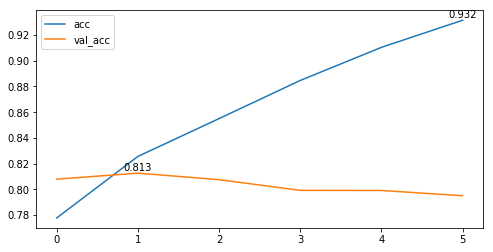

In [15]:
hist_dict = hist_lstm.history

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for key in ['categorical_accuracy' , 'val_categorical_accuracy']:
    y = hist_dict[key]
    ax.plot(y,label=key)
    max_index = np.argsort(y)[-1]
    ax.annotate('{0:.3f}'.format(y[max_index]) , xy =(max_index , y[max_index]+0.002),horizontalalignment='center' )

plt.legend()    
plt.show()

In [ ]:
## 練習自己建以及使用Merge

def build(weight_matrix , vocab):
    embedding_vecor_length = weight_matrix.shape[1]
    word_total_index = len(vocab)

    forget_bias_bool=False #default is False
    recu_drop_rate=0.2
    drop_rate=0.2
    back_bool=False #default False
    unroll_bool=True #default is False. This can speed up but consume more memory
    multi_layer_bool=True #default False

    my_input = Input(shape = (max_review_length,))
    embd = Embedding(word_total_index, embedding_vecor_length, input_length=max_review_length,
                       weights = [weight_matrix])(my_input)
    
    block1_1 = LSTM(256,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=True,
                  unroll=unroll_bool,
                  return_sequences=True )(embd)  
    lstm1_1 = LSTM(128,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=False )(block1_1)  
    block1_1 = Conv1D(256,5,strides=1,activation='relu')(block1_1)
    #block1_1 = Conv1D(128,3,strides=1,activation='relu')(block1_1)
    block1_1 = ZeroPadding1D(1)(block1_1)
    block1_1 = MaxPooling1D(3,strides=1)(block1_1)
    block1_1 = Dropout(0.2)(block1_1)
    
    block1_2 = LSTM(256,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=True )(block1_1)  
    lstm1_2 = LSTM(128,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=False )(block1_2)
    
    #block1_2 = Conv1D(128,5,strides=1,activation='relu')(block1_2)
    block1_2 = Dropout(0.2)(block1_2)
    block1_2 = Conv1D(256,3,strides=1,activation='relu')(block1_2)
    block1_2 = ZeroPadding1D(1)(block1_2)
    block1_2 = MaxPooling1D(3,strides=1)(block1_2)
    block1_2 = Dropout(0.2)(block1_2)
    
    block1_3 = LSTM(256,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=True )(block1_2)  
    lstm1_3 = LSTM(128,
                  unit_forget_bias=forget_bias_bool,
                  recurrent_dropout=recu_drop_rate,
                  dropout=drop_rate,
                  go_backwards=back_bool,
                  unroll=unroll_bool,
                  return_sequences=False )(block1_3)
    
    
    block2 = Concatenate()([lstm1_1,lstm1_2,lstm1_3])
    block2 = Dropout(0.25)(block2)
    
    fc1 = Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.1))(block2)
    fc1 = Dropout(0.5)(fc1)
    
    fc2 = Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.1))(fc1)
    fc2 = Dropout(0.5)(fc2)
    
    fc3 = Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.1))(fc2)
    fc3 = Dropout(0.5)(fc3)
    
    my_output = Dense(2,activation='softmax')(fc3)

    model = Model(inputs=my_input , outputs=my_output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
    model.summary()
    
    return model

try:
    del model
except NameError:
    pass

model = build(weight_matrix , vocab)
    
n_batch = 256
n_epoch = 10

earlystopping=EarlyStopping(monitor='val_categorical_accuracy', patience=3, verbose=0, mode='auto')
history = History()

hist_lstm = model.fit(X_train , Y_train ,
                      batch_size = n_batch,epochs=n_epoch,
                      callbacks=[earlystopping,history],
                      validation_split=0.1)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 100)           0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 100, 128)      10051712    input_1[0][0]                    
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 100, 256)      394240      embedding_1[0][0]                
____________________________________________________________________________________________________
conv1d_1 (Conv1D)                (None, 96, 256)       327936      lstm_1[0][0]                     
___________________________________________________________________________________________

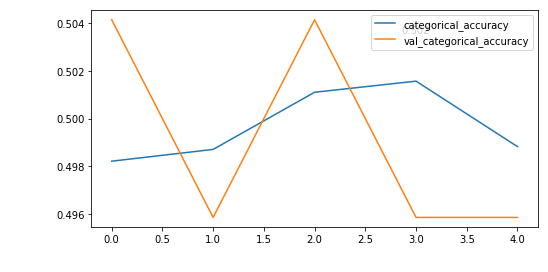

In [19]:
hist_dict = hist_lstm.history

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for key in ['categorical_accuracy' , 'val_categorical_accuracy']:
    y = hist_dict[key]
    ax.plot(y,label=key)
    max_index = np.argsort(y)[-1]
    ax.annotate('{0:.3f}'.format(y[max_index]) , xy =(max_index , y[max_index]+0.002),horizontalalignment='center' )

plt.legend()    
plt.show()

In [33]:
## Save model
save_model=True
model_path=os.path.join(para_path,'CRNN_1st.h5')

if save_model:
    model.save(model_path)
    print("The model is saved.")

The model is saved.


## predict ouput

In [32]:
pred_y = model.predict(X_test,batch_size=n_batch)

print("Shape of predict of test : ",pred_y.shape)

predict_path = "/home/derricksu/pred/CRNN_11_29.csv"

with open(predict_path , "w" , encoding = "utf-8") as f :
    f.write("id,label\n")
    for i ,pre in enumerate(pred_y):
        f.write( "{0},{1}\n".format( i , np.argmax(pre) ) )
    f.close()

Shape of predict of test :  (200000, 2)


### First trial
    min_c = 5
    iter = 30
    lstm units = 128
    dense = 128
    dropout = 0.5
    dense = 2

## Second trial

    bag of word : word2vec_2nd.bin
    word_freq   : word_freq_2nd.pk
    model       : lstm_11_26.h5  (lstm 128 > 256 > NN256 >2)